IMPORTING THE LIBRARIES

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA COLLECTION AND PROCESSING

In [29]:
gold_data = pd.read_csv('/content/gold price dataset.csv')

In [30]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [31]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [32]:
gold_data.shape

(2290, 6)

In [33]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [34]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [35]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


CORRELATION STUDY - POSITIVE AND NEGATIVE

In [36]:
correlation = gold_data.corr()

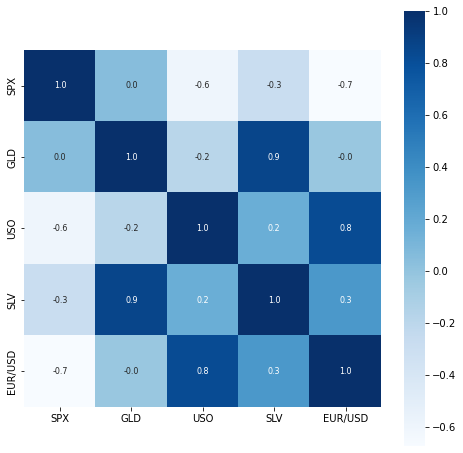

In [37]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [38]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


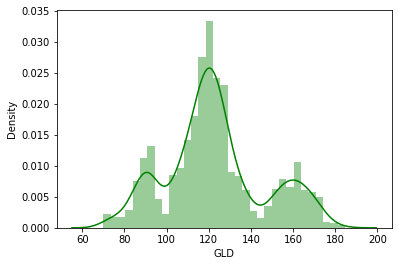

In [39]:
sns.distplot(gold_data['GLD'],color='green')

SPLITTING THE FEATURES AND TARGET

In [40]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [41]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [42]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


SPLITTING THE TRAINING AND TEST DATA

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

TRAINING THE MODEL USING RANDOM FOREST REGRESSOR

In [44]:
regressor = RandomForestRegressor(n_estimators=100)

In [45]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

MODEL EVALUATION

In [46]:
test_data_prediction = regressor.predict(X_test)

In [47]:
print(test_data_prediction)

[168.53309895  82.04769979 116.13990007 127.59580069 120.6946012
 154.59249767 150.49209951 126.13919975 117.55109852 125.94340052
 116.85750136 172.30780074 141.1943986  167.90849854 115.10590046
 117.50880034 137.97780257 170.22580083 160.04580269 155.73639968
 155.17279993 125.34810056 176.38359918 157.83960359 125.26070049
  93.66249962  77.05390028 120.71619996 119.15109957 167.51220019
  88.1868007  125.26049971  91.18070098 117.65840016 121.18199932
 136.56920032 115.42700131 115.28920096 146.83469923 107.29230067
 104.46000224  87.16479809 126.45210047 117.92519969 153.25999847
 119.69980037 108.42149963 107.99779826  93.23120063 127.25289708
  75.16520035 113.62369946 121.1224001  111.29319864 118.92769881
 121.11119922 158.9068998  167.66920136 146.97229638  85.62199817
  94.31570022  86.78189865  90.38660016 118.9505008  126.34580084
 127.47950009 169.39490042 122.18629936 117.35949893  98.72800029
 168.48320057 143.16039817 132.98390185 121.1958026  121.06859934
 119.593200

In [48]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9889375258378309


COMPARING THE ACTUAL AND PREDICTED VALUES

In [49]:
Y_test = list(Y_test)

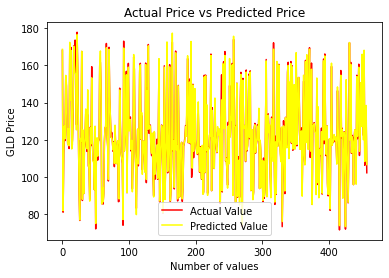

In [50]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()